# <center>L2 Computational Physics</center>
---

## Week 5: Monte Carlo Methods

In this notebook, you will simulate a system with of three nuclei $A$, $B$ and $C$ where $A$ decays into $B$ and $B$ decays into $C$. If exposed to a neutron flux nucleus $C$ can be activated into a nucleus $A$. 

In [2]:
import numpy
from matplotlib import pyplot as plt
import random

Implement a function that tells whether a transition has occured, based on the transition probability and a random number. Use the random number `r` from `random.random()` and use the procedure described in the notes so that the checks can work in a reproducible way.

In [3]:
def has_transitioned(prob):
    r = random.random()
    if r<=prob:
        return True
    else:
        return False

In [4]:
# this test is worth 1 mark
random.seed(9867)
assert [ has_transitioned(0.5) for i in range(10)] == [False, False, True, False, False, False, False, True, False, True]

In [5]:
p = has_transitioned(1.0)
print(p)

True


We are going to keep track of the state of the atoms using a either `'A'`, `'B'` or `'C'` for each nucleus. For example 
```python
state = ['A', 'A', 'B', 'A', 'C']
```

We will capture the possible physical reaction in a list of allowed transitions such as

`('A', 'B', 0.25 )`

where the first element is the initial state, the second element is the final state of the transition and its probability in the time interval considered is the third argument.

Define a function that takes as arguments the current state and a list of such transition rules and implements the transition (or not) and returns the new state

In [6]:
def evolveOne(currentState, rules):
    
    finalstate = currentState
    
    for statenow,stateafter,probs in rules:
            
        if currentState == statenow:
                
            truthval = has_transitioned(probs)
                
            if truthval == True:
                finalstate = stateafter
            else:
                finalstate = statenow
    
    
    
    return finalstate
              

In [7]:
# these tests are worth 1 mark
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]
assert evolveOne('A', alwaysDecayRules) == 'B'
assert evolveOne('B', alwaysDecayRules) == 'C'

In [8]:
# these tests are worth 2 mark
random.seed(112211)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'B'

assert evolveOne('B', testRules) == 'B'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'

# with no rules there should be no change
assert evolveOne('C', testRules) == 'C'


Now implement a function that takes a list of states and transition them according to the rules passed as argument. This function should return a new vector of states, it should not modify the state passed as an argument!

In [9]:
def evolveMany(states, rules):
    newState = []
    
    for i in range(0,len(states)):
        finalState = evolveOne(states[i],rules)
        newState.append(finalState)
    
    
    return newState


In [10]:
# these tests are worth 1 mark
random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)
targetArray = ['B', 'C', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C', 'C'] 
assert evolvedTest == targetArray
# checks the initial array is left unchanged
assert initialTestArray == ['A','B','C']*5

Define a function that evolves a system that starts with initial amounts `NA`, `NB` and `NC` of $A$, $B$ and $C$ nuclei and evolved it in `n_timestep` from time $t=0$ to $t=t_{max}$. The function should return three arrays, one for each atom type, of the number of nuclei of that type at each time step. Each array should contain `n_timestep+1` elements including the initial amount. 
 

In [13]:
def evolve_system(NA, NB, NC, rules, n_step):
    state = (['A'] * NA)+(['B'] * NB)+(['C'] * NC)

    A_count = numpy.empty(n_step + 1, dtype=int)
    B_count = numpy.empty(n_step + 1, dtype=int)
    C_count = numpy.empty(n_step + 1, dtype=int)
    for i in range(0,n_step+1):
        A_count[i] = state.count('A')
        B_count[i] = state.count('B')
        C_count[i] = state.count('C')
        for j in range(len(state)):
            state[j] = evolveOne(state[j],rules)
    
    return A_count, B_count, C_count


In [1]:
#def evolve_system(NA, NB, NC, rules, n_step):
    state = (['A'] * NA)+(['B'] * NB)+(['C'] * NC)
    
    A_count = numpy.empty(n_step + 1, dtype=int)
    B_count = numpy.empty(n_step + 1, dtype=int)
    C_count = numpy.empty(n_step + 1, dtype=int)
    
    for i in range(0,n_steps+1):
        A_count[i] = state.count('A')
        B_count[i] = state.count('B')
        C_count[i] = state.count('C')
        for j in range(len(state)):
            state[j] = evolveOne(state[j],rules)
    
    return A_count, B_count, C_count

In [14]:
# these tests are worth 2 marks
rules = [
    ('A', 'B', 0.0033),
    ('B', 'C', 0.0075),
    ('C', 'A', 0.009)
    
]

r1, r2, r3 = evolve_system(0,0,250, rules, 17)
assert len(r1) == 18
assert len(r2) == 18
assert len(r3) == 18

## Plotting tasks

Create a plot with the number of $A$, $B$ and $C$ nuclei, starting with 250 $C$ nuclei and evolving the system for 100 hours using 200 steps and with neutron flux on. Evolve the system for another 100 hours (using 200 steps) without neutron flux (i.e. no transitions from $C$ to $A$).  

The half life of the $A$ atoms is 10.1 hours, the half life of $B$ nuclei is 15.7 hours and we can caracterise the rate of activation of $C$ into $A$ when the neutron flux is on with and effective half-life of 3.2 hours.

The plot should have the appropriate labels and legend. [8 marks]    




[250 319 351 346 321 309 275 280 281 277 264 255 260 273 271 267 266 243
 247 256 260 259 268 270 265 270 260 268 245 245 251 272 270 254 240 246
 261 268 263 267 253 259 253 243 250 251 266 239 240 240 259 244 247 244
 239 246 271 255 263 271 263 272 263 260 262 283 287 281 276 275 272 254
 250 248 254 261 257 258 261 259 239 250 264 269 266 277 247 242 245 235
 238 234 243 250 264 258 248 243 253 262 259 259 269 256 244 237 247 255
 252 265 269 264 265 267 251 246 258 273 265 239 243 248 251 252 247 271
 259 268 278 267 245 235 240 225 228 225 229 243 246 263 257 256 260 259
 249 253 269 262 256 249 246 251 251 255 261 259 256 248 242 258 246 248
 251 256 251 263 265 264 251 271 272 267 274 265 265 265 263 266 267 266
 279 262 272 264 258 269 256 248 236 236 240 244 256 258 254 258 257 263
 247 240 242]


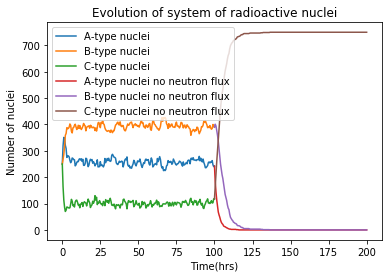

In [17]:
nsteps = 200
t_total = 100
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2
prob_A = 1-numpy.exp(-(nsteps/t_total)/t_half_A)
prob_B = 1-numpy.exp(-(nsteps/t_total)/t_half_B)
prob_C = 1-numpy.exp(-(nsteps/t_total)/t_half_C)
rules_nf = [
    ('A','B',prob_A),
    ('B','C',prob_B),
    ('C','A',prob_C)
]
rules_nonf = [
    ('A','B',prob_A),
    ('B','C',prob_B)
]

x_nf = numpy.linspace(0,t_total,nsteps+1)
x_nonf = numpy.linspace(t_total,2*t_total,nsteps+1)

A_count1, B_count1, C_count1 = evolve_system(250,250,250,rules_nf,nsteps)
print(A_count1)
A_count2, B_count2, C_count2 = evolve_system(A_count1[nsteps],B_count1[nsteps],C_count1[nsteps],rules_nonf,nsteps)

plt.plot(x_nf,A_count1,label = 'A-type nuclei')
plt.plot(x_nf,B_count1,label = 'B-type nuclei')
plt.plot(x_nf,C_count1,label = 'C-type nuclei')
plt.plot(x_nonf,A_count2,label = 'A-type nuclei no neutron flux')
plt.plot(x_nonf,B_count2,label = 'B-type nuclei no neutron flux')
plt.plot(x_nonf,C_count2,label = 'C-type nuclei no neutron flux')
plt.xlabel('Time(hrs)')
plt.ylabel('Number of nuclei')
plt.title('Evolution of system of radioactive nuclei')
plt.legend(loc='upper left')

Run the above simulation 20 times with 200 steps and use the results to calculate an average and the uncertainty on the number of $A$ atoms as a function of time. Use and `errorbar` plot for it. You might be interested in the `numpy.average` and `numpy.std` functions. The plot should have axis labels and a title.  [3 marks]


In [ ]:
nsim = 20
nsteps = 200

for i in range(nsim):
    nsteps = 200
    t_total = 100
    t_half_A = 10.1
    t_half_B = 15.7
    t_half_C = 3.2
    prob_A = 1-numpy.exp(-(nsteps/t_total)/t_half_A)
    prob_B = 1-numpy.exp(-(nsteps/t_total)/t_half_B)
    prob_C = 1-numpy.exp(-(nsteps/t_total)/t_half_C)
    rules_nf = [
        ('A','B',prob_A),
        ('B','C',prob_B),
        ('C','A',prob_C)
    ]
    rules_nonf = [
        ('A','B',prob_A),
        ('B','C',prob_B)
    ]

    x_nf = numpy.linspace(0,t_total,nsteps+1)
    x_nonf = numpy.linspace(t_total,2*t_total,nsteps+1)

    A_count1, B_count1, C_count1 = evolve_system(250,250,250,rules_nf,nsteps)
    print(A_count1)
    A_count2, B_count2, C_count2 = evolve_system(A_count1[nsteps],B_count1[nsteps],C_count1[nsteps],rules_nonf,nsteps)